In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

#plotting
plt.rcParams.update({'font.size': 16})

**Exercise 3.2 (i)**

In [2]:
def bisection(f, a, b, tol):
    ai = a
    bi = b
    
    while f(ai)*f(bi) > 0:
        bi = (ai + bi)/2
    
    xi = (ai + bi)/2
    while (bi - ai) >= tol:

        if f(xi)*f(ai) < 0:
            bi = xi
            xi = (ai + bi)/2
        
        elif f(xi)*f(bi) < 0:
            ai = xi
            xi = (ai + bi)/2
            
        else:
            print('whoops')
    
    return xi

In [3]:
def ClopperPearson(n, x, alpha):
    
    def Binprob(x, p):
        P = 0
        for k in range(x+1):
            P += m.comb(n, k)*p**k*(1-p)**(n-k)
        return P

    def P1(p):
        return Binprob(x, p) - (1 - alpha/2)
    
    def P2(p):
        return Binprob(x, p) - alpha/2
    
    p1 = bisection(P1, 0, 1, 1e-8)
    p2 = bisection(P2, 0, 1, 1e-8)
    
    return [p1, p2]

In [4]:
ClopperPearson(20, 10, 0.05)

[0.3152781315147877, 0.7280421517789364]

**Exercise 3.2 (ii)**

In [5]:
ClopperPearson(12, 11, 0.05)

[0.7353515289723873, 0.9978924058377743]

**Exercise 3.3**

In [6]:
from scipy.stats import norm

mu = 75
sigma = 7

mu_s = 72
n_s = 30

stat = (mu_s - mu)/(sigma/np.sqrt(n_s))

H0 = 'The school matches the national average mark'
alpha = 0.01

print(stat)

p = norm.sf(abs(stat))

if p < alpha:
    print('We reject H0: ' + H0)

else:
    print('We fail to reject H0: ' + H0)

-2.347382389307855
We reject H0: The school matches the national average mark


**Exercise 3.4**

In [7]:
p1s = np.arange(0.01,0.5,0.01)
p2s = np.arange(0.51,1.0,0.01)
ps = np.hstack((p1s,p2s))
ps

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
       0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
       0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78,
       0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,
       0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [8]:
def Pfair(n, p):
    P = 0
    for k in range(40,61):
        P += m.comb(n, k)*p**k*(1-p)**(n-k)
    return P

def Pextr(n, p):
    return 1 - Pfair(n, p)

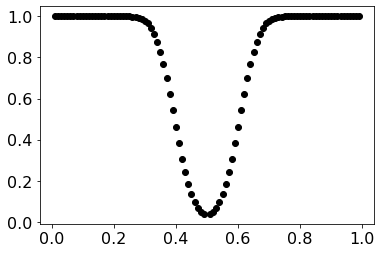

In [9]:
for p in ps:
    #print(Pextr(100, p))
    plt.plot(p, Pextr(100, p), 'ko')

In [10]:
def beta(n, p):
    stat1 = (40 - n*p)/(np.sqrt(n)*p*(1-p))
    stat2 = (60 - n*p)/(np.sqrt(n)*p*(1-p))
    return norm.sf(abs(stat1)) + norm.sf(abs(stat2))

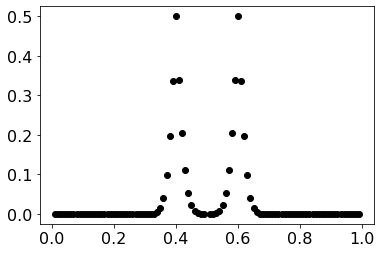

In [11]:
for p in ps:
    #print(Pextr(100, p))
    plt.plot(p, beta(100, p), 'ko')

**Exercise 3.5**

In [12]:
mu = 0.5
sigma = 1/12
alpha = 0.01
H0 = 'mu = 0.5'

ms = np.arange(5,105,5)

for m in ms:
    print('\n')
    print('m = ',m)
    ns = np.random.uniform(size=m)
    nhat = ns.mean()

    stat = (nhat - mu)/(sigma/np.sqrt(m))
    print('z = %.3f' % stat)

    p = norm.sf(abs(stat))
    print('p-value: %.3f' % p)
    
    if p < alpha:
        print('We reject H0: ' + H0)

    else:
        print('We fail to reject H0: ' + H0)



m =  5
z = -2.179
p-value: 0.015
We fail to reject H0: mu = 0.5


m =  10
z = 0.828
p-value: 0.204
We fail to reject H0: mu = 0.5


m =  15
z = 6.722
p-value: 0.000
We reject H0: mu = 0.5


m =  20
z = -7.392
p-value: 0.000
We reject H0: mu = 0.5


m =  25
z = 0.500
p-value: 0.308
We fail to reject H0: mu = 0.5


m =  30
z = 4.078
p-value: 0.000
We reject H0: mu = 0.5


m =  35
z = -5.384
p-value: 0.000
We reject H0: mu = 0.5


m =  40
z = 7.493
p-value: 0.000
We reject H0: mu = 0.5


m =  45
z = -2.479
p-value: 0.007
We reject H0: mu = 0.5


m =  50
z = 0.152
p-value: 0.440
We fail to reject H0: mu = 0.5


m =  55
z = 2.335
p-value: 0.010
We reject H0: mu = 0.5


m =  60
z = -5.904
p-value: 0.000
We reject H0: mu = 0.5


m =  65
z = 2.168
p-value: 0.015
We fail to reject H0: mu = 0.5


m =  70
z = 0.706
p-value: 0.240
We fail to reject H0: mu = 0.5


m =  75
z = -0.538
p-value: 0.295
We fail to reject H0: mu = 0.5


m =  80
z = 1.067
p-value: 0.143
We fail to reject H0: mu = 0.5


m

**Exercise 3.6**

In [13]:
from statistics import variance

Mathsys = np.array([65, 73, 51, 67, 48, 80, 69, 83, 89, 62, 71, 67, 64, 78, 85, 49, 80, 60, 51, 70])
plebs = np.array([63, 72, 47, 63, 44, 78, 67, 52, 54, 58, 68, 65, 63, 77, 62, 46, 78, 56, 49, 65])

n_x = len(Mathsys)
n_y = len(plebs)
mu_x = Mathsys.mean()
mu_y = plebs.mean()
var_x = variance(Mathsys)
var_y = variance(plebs)
print(mu_x)
print(mu_y)

H0 = 'mu_x = mu_y'
alpha = 0.05

stat = (mu_x - mu_y)/np.sqrt(var_x/n_x + var_y/n_y)
print('z = %.3f' % stat)

p = norm.sf(abs(stat))
print('p-value: %.3f' % p)
    
if p < alpha:
    print('We reject H0: ' + H0)

else:
    print('We fail to reject H0: ' + H0)

68.1
61.35
z = 1.876
p-value: 0.030
We reject H0: mu_x = mu_y


**Exercise 3.7**

In [14]:
from scipy.stats import t

mu = 66.5
xbar = 67.4
std = 10
n = 408

H0 = 'height of individuals at the sports club is greater than UK average'
alpha = 0.05

tt = (xbar - mu)/(std/np.sqrt(n))
print('t: %.4f' % tt)

# t-test
p = t.sf(np.abs(tt),n-1)
print('p-value: %.3f' % p)

if p < alpha:
    print('We reject H0: ' + H0)

else:
    print('We fail to reject H0: ' + H0)
    
# z-test
p = norm.sf(np.abs(tt))
print('\n')
print('p-value: %.3f' % p)

if p < alpha:
    print('We reject H0: ' + H0)

else:
    print('We fail to reject H0: ' + H0)

t: 1.8179
p-value: 0.035
We reject H0: height of individuals at the sports club is greater than UK average


p-value: 0.035
We reject H0: height of individuals at the sports club is greater than UK average


**Exercise 3.8**

In [15]:
import pandas as pd

grades = pd.read_excel('./grades_data.xlsx',header=None)
grades

,0
0,77
1,74
2,80
3,76
4,77
...,...
115,89
116,63
117,69
118,79


In [16]:
mu = 74
xbar = grades.mean()
n = len(grades)
std = n/(n-1)*grades.std()

H0 = 'mu = %d' % mu
alpha = 0.05

tt = (xbar - mu)/(std/np.sqrt(n))
print('t: %.4f' % tt)

# t-test
p = t.sf(np.abs(tt),n-1)
print('p-value: %.3f' % p)

if p < alpha:
    print('We reject H0: ' + H0)

else:
    print('We fail to reject H0: ' + H0)

t: 1.6467
p-value: 0.051
We fail to reject H0: mu = 74


In [17]:
from scipy.stats import ttest_1samp
print(ttest_1samp(grades, mu))
ttest_1samp(grades, mu).pvalue > alpha

Ttest_1sampResult(statistic=array([1.66051704]), pvalue=array([0.09944323]))


array([ True])

In [18]:
mus = np.arange(0,101)

for mu in mus:
    print('\n')
    print('mu = ', mu)
    H0 = 'mu = %d' % mu
    
    if (ttest_1samp(grades, mu).pvalue < alpha) == True:
        print('We reject H0: ' + H0)
        
    else:
        print('We fail to reject H0: ' + H0)



mu =  0
We reject H0: mu = 0


mu =  1
We reject H0: mu = 1


mu =  2
We reject H0: mu = 2


mu =  3
We reject H0: mu = 3


mu =  4
We reject H0: mu = 4


mu =  5
We reject H0: mu = 5


mu =  6
We reject H0: mu = 6


mu =  7
We reject H0: mu = 7


mu =  8
We reject H0: mu = 8


mu =  9
We reject H0: mu = 9


mu =  10
We reject H0: mu = 10


mu =  11
We reject H0: mu = 11


mu =  12
We reject H0: mu = 12


mu =  13
We reject H0: mu = 13


mu =  14
We reject H0: mu = 14


mu =  15
We reject H0: mu = 15


mu =  16
We reject H0: mu = 16


mu =  17
We reject H0: mu = 17


mu =  18
We reject H0: mu = 18


mu =  19
We reject H0: mu = 19


mu =  20
We reject H0: mu = 20


mu =  21
We reject H0: mu = 21


mu =  22
We reject H0: mu = 22


mu =  23
We reject H0: mu = 23


mu =  24
We reject H0: mu = 24


mu =  25
We reject H0: mu = 25


mu =  26
We reject H0: mu = 26


mu =  27
We reject H0: mu = 27


mu =  28
We reject H0: mu = 28


mu =  29
We reject H0: mu = 29


mu =  30
We reject H0: mu = 

**Exercise 3.9**

In [19]:
ak = np.array([20,20,20,20,20,20])
bk = np.array([17,14,19,15,21,34])
n = 120

chi = np.sum([(ak[i] - bk[i])**2/bk[i] for i in range(len(ak))])
chi

10.632463511720477

In [20]:
from scipy.stats import chi2

p = chi2.sf(chi, n-1)
print('p-value: %.3f' % p)

H0 = 'ak distributed as expected'
sig = np.array([0.05,0.01])

for alpha in sig:
    print('\n')
    print('alpha: ', alpha)
    if p < alpha:
        print('We reject H0: ' + H0)

    else:
        print('We fail to reject H0: ' + H0)

p-value: 1.000


alpha:  0.05
We fail to reject H0: ak distributed as expected


alpha:  0.01
We fail to reject H0: ak distributed as expected


**Exercise 3.12**

In [21]:
mu = 5
xbar = 6.7
std = 7.1
n = 29

H0 = 'average weight gain per person was more than 5 pounds'
alpha = 0.05

tt = (xbar - mu)/(std/np.sqrt(n))
print('t: %.4f' % tt)

# t-test
p = t.sf(np.abs(tt),n-1)*2
print('p-value: %.3f' % p)

if p < alpha:
    print('We reject H0: ' + H0)

else:
    print('We fail to reject H0: ' + H0)

t: 1.2894
p-value: 0.208
We fail to reject H0: average weight gain per person was more than 5 pounds


**Exercise 3.10**

In [22]:
ds = pd.read_excel('./nasdaq_share_price_data.xlsx',usecols=[2])

# check for NaN entries
print(ds.isnull().values.any())

# remove entries which lead with zero and convert to strings
ds = ds[(ds['Last Sale'] >= 1)].astype(str)
ds

False


,Last Sale
0,3.05
1,22.22
2,4.26
3,8.82
4,61.08
...,...
4247,9.71
4248,10.0
4250,41.15
4251,5.98


In [23]:
ds.head(22)

,Last Sale
0,3.05
1,22.22
2,4.26
3,8.82
4,61.08
5,133.11
6,68.18
7,53.02
8,20.74
9,19.2


In [24]:
idx = ds.index.values
print(idx)

[   0    1    2 ... 4250 4251 4252]


In [25]:
firstdigs = []
for i in idx:
    firstdigs += [ds['Last Sale'][i][0]]

firstdigs = np.array(firstdigs,dtype=int)
len(firstdigs)

4018

<AxesSubplot:ylabel='Count'>

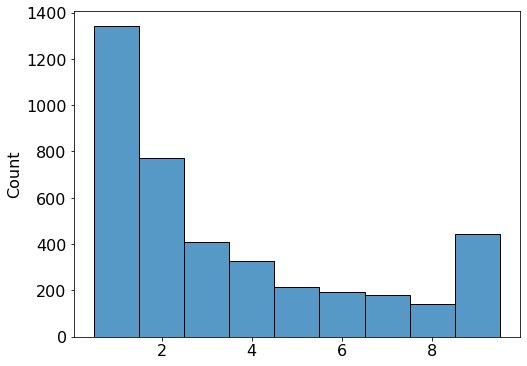

In [26]:
bins = np.array([1,2,3,4,5,6,7,8,9])
fig = plt.figure(figsize=(8,6))
sns.histplot(firstdigs, bins=bins, discrete=True)

<AxesSubplot:ylabel='Count'>

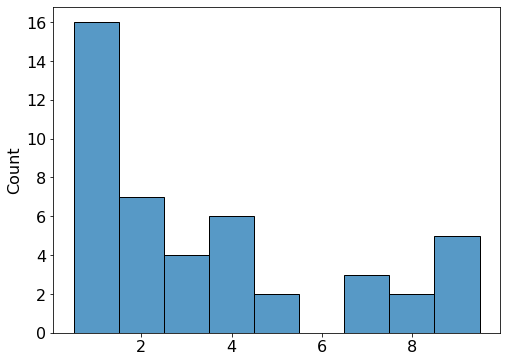

In [27]:
# generating sample
n = 45
np.random.shuffle(firstdigs)
sample = firstdigs[:n]

fig = plt.figure(figsize=(8,6))
sns.histplot(sample, bins=bins, discrete=True)

In [28]:
unif_exp = (n/9)*np.ones(9)
bedf_exp = n*np.array([np.log10(1+1/i) for i in bins])

sample_freq = np.zeros(9)
for j in range(1,10):
    sample_freq[j-1] = np.count_nonzero(sample == j)

In [29]:
# uniform test
ak = sample_freq
bk = unif_exp

chi = np.sum([(ak[i] - bk[i])**2/bk[i] for i in range(len(ak))])
print('chi^2: %.3f' % chi)

p = chi2.sf(chi, n-1)
print('p-value: %.3f' % p)

H0 = 'ak distributed as expected'
sig = np.array([0.05,0.01])

for alpha in sig:
    print('\n')
    print('alpha: ', alpha)
    if p < alpha:
        print('We reject H0: ' + H0)

    else:
        print('We fail to reject H0: ' + H0)

chi^2: 34.800
p-value: 0.838


alpha:  0.05
We fail to reject H0: ak distributed as expected


alpha:  0.01
We fail to reject H0: ak distributed as expected


In [30]:
# bedford test
ak = sample_freq
bk = bedf_exp

chi = np.sum([(ak[i] - bk[i])**2/bk[i] for i in range(len(ak))])
print('chi^2: %.3f' % chi)

p = chi2.sf(chi, n-1)
print('p-value: %.3f' % p)

H0 = 'ak distributed as expected'
sig = np.array([0.05,0.01])

for alpha in sig:
    print('\n')
    print('alpha: ', alpha)
    if p < alpha:
        print('We reject H0: ' + H0)

    else:
        print('We fail to reject H0: ' + H0)

chi^2: 9.633
p-value: 1.000


alpha:  0.05
We fail to reject H0: ak distributed as expected


alpha:  0.01
We fail to reject H0: ak distributed as expected


chi^2: 34.800
p-value: 0.838


alpha:  0.05
We fail to reject H0: ak distributed as expected


alpha:  0.01
We fail to reject H0: ak distributed as expected


chi^2: 9.267
p-value: 1.000


alpha:  0.05
We fail to reject H0: ak distributed as expected


alpha:  0.01
We fail to reject H0: ak distributed as expected


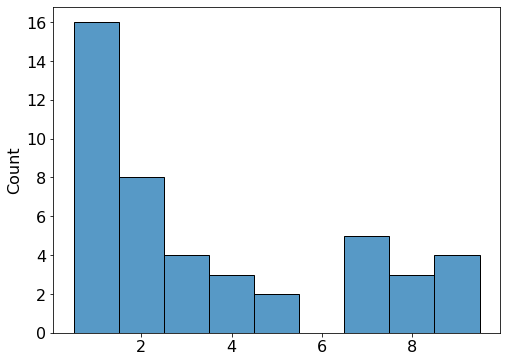

In [31]:
# repeat for n = 450

# generating sample
n = 45
np.random.shuffle(firstdigs)
sample = firstdigs[:n]

fig = plt.figure(figsize=(8,6))
sns.histplot(sample, bins=bins, discrete=True)

unif_exp = (n/9)*np.ones(9)
bedf_exp = n*np.array([np.log10(1+1/i) for i in bins])

sample_freq = np.zeros(9)
for j in range(1,10):
    sample_freq[j-1] = np.count_nonzero(sample == j)
    
# uniform test
ak = sample_freq
bk = unif_exp

chi = np.sum([(ak[i] - bk[i])**2/bk[i] for i in range(len(ak))])
print('chi^2: %.3f' % chi)

p = chi2.sf(chi, n-1)
print('p-value: %.3f' % p)

H0 = 'ak distributed as expected'
sig = np.array([0.05,0.01])

for alpha in sig:
    print('\n')
    print('alpha: ', alpha)
    if p < alpha:
        print('We reject H0: ' + H0)

    else:
        print('We fail to reject H0: ' + H0)
        
# bedford test
ak = sample_freq
bk = bedf_exp

chi = np.sum([(ak[i] - bk[i])**2/bk[i] for i in range(len(ak))])
print('\n')
print('chi^2: %.3f' % chi)

p = chi2.sf(chi, n-1)
print('p-value: %.3f' % p)

H0 = 'ak distributed as expected'
sig = np.array([0.05,0.01])

for alpha in sig:
    print('\n')
    print('alpha: ', alpha)
    if p < alpha:
        print('We reject H0: ' + H0)

    else:
        print('We fail to reject H0: ' + H0)